### Regression - Price Predict ###

In [2]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
%matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats

# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

# Carreguem dataset d'exemple
X_test = load_dataset('test.csv')
X_train = load_dataset('train.csv')
y_test = load_dataset('y_test.csv')
y_train = load_dataset('y_train.csv')

X_train = X_train[:-1]
X_test = X_test[:-1]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)



(10497, 16)
(10497, 1)
(4499, 16)
(4499, 1)


In [50]:
#agrupem i visualitzem les dades test
test=X_test.assign(Price=y_test)
test.head()
test.describe()

,accommodates,bathrooms,bedrooms,calculated_host_listings_count,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,d_centre,instant_bookable_f,instant_bookable_t,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,Price
count,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000,4499.000
mean,2.849,1.107,1.399,2.937,1.486,3.426,52.365,4.889,2.820,18.010,2.993,0.843,0.157,0.778,0.217,0.006,130.806
std,1.230,0.299,0.826,8.796,0.905,11.313,0.016,0.035,5.115,34.887,1.590,0.364,0.364,0.416,0.412,0.074,63.967
min,1.000,0.000,0.000,1.000,1.000,0.000,52.291,4.775,1.000,0.000,0.213,0.000,0.000,0.000,0.000,0.000,23.000
25%,2.000,1.000,1.000,1.000,1.000,1.000,52.356,4.864,2.000,2.000,1.949,1.000,0.000,1.000,0.000,0.000,89.000
50%,2.000,1.000,1.000,1.000,1.000,1.000,52.365,4.887,2.000,7.000,2.854,1.000,0.000,1.000,0.000,0.000,117.000
75%,4.000,1.000,2.000,1.000,2.000,1.000,52.375,4.908,3.000,18.000,3.577,1.000,0.000,1.000,0.000,0.000,150.000
max,16.000,4.000,10.000,91.000,16.000,106.000,52.425,5.028,180.000,408.000,11.593,1.000,1.000,1.000,1.000,1.000,433.000


In [4]:
#agrupem i visualitzem les dades train
train=X_train.assign(Price=y_train)
train.head()
#train.describe()

,accommodates,bathrooms,bedrooms,calculated_host_listings_count,guests_included,host_listings_count,latitude,longitude,minimum_nights,number_of_reviews,d_centre,instant_bookable_f,instant_bookable_t,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,Price
0,4,2.000,2.000,1,1,1.000,52.358,4.934,2,8,3.279,1,0,1,0,0,120.000
1,4,1.000,2.000,1,2,1.000,52.364,4.983,3,0,5.952,1,0,1,0,0,99.000
2,2,1.000,1.000,1,1,1.000,52.375,4.862,3,8,2.601,1,0,1,0,0,100.000
3,2,1.000,1.000,1,1,1.000,52.387,4.890,2,41,1.095,1,0,0,1,0,175.000
4,2,1.000,1.000,1,1,1.000,52.384,4.890,3,0,0.844,1,0,1,0,0,119.000


In [5]:
# mirem si hi ha valors nulls
train.isnull().sum()

accommodates                      0
bathrooms                         0
bedrooms                          0
calculated_host_listings_count    0
guests_included                   0
host_listings_count               0
latitude                          0
longitude                         0
minimum_nights                    0
number_of_reviews                 0
d_centre                          0
instant_bookable_f                0
instant_bookable_t                0
room_type_Entire home/apt         0
room_type_Private room            0
room_type_Shared room             0
Price                             0
dtype: int64

In [6]:
# mirem que no té cap null
train.notnull().sum()

accommodates                      10497
bathrooms                         10497
bedrooms                          10497
calculated_host_listings_count    10497
guests_included                   10497
host_listings_count               10497
latitude                          10497
longitude                         10497
minimum_nights                    10497
number_of_reviews                 10497
d_centre                          10497
instant_bookable_f                10497
instant_bookable_t                10497
room_type_Entire home/apt         10497
room_type_Private room            10497
room_type_Shared room             10497
Price                             10497
dtype: int64

In [7]:
# mirem si te NaN's
train.isna().sum()

accommodates                      0
bathrooms                         0
bedrooms                          0
calculated_host_listings_count    0
guests_included                   0
host_listings_count               0
latitude                          0
longitude                         0
minimum_nights                    0
number_of_reviews                 0
d_centre                          0
instant_bookable_f                0
instant_bookable_t                0
room_type_Entire home/apt         0
room_type_Private room            0
room_type_Shared room             0
Price                             0
dtype: int64

In [8]:
# mirem la correlació de les dades amb el preu
train.corr()['Price']

accommodates                     -0.002
bathrooms                         0.002
bedrooms                         -0.005
calculated_host_listings_count   -0.002
guests_included                   0.012
host_listings_count              -0.004
latitude                          0.010
longitude                         0.015
minimum_nights                   -0.005
number_of_reviews                 0.003
d_centre                         -0.014
instant_bookable_f               -0.003
instant_bookable_t                0.003
room_type_Entire home/apt         0.003
room_type_Private room           -0.000
room_type_Shared room            -0.019
Price                             1.000
Name: Price, dtype: float64

In [9]:
corr = train.corr()
priceCorr = corr.Price.sort_values(ascending = False)
print('Most Positive Correlations\n',priceCorr.head(),'\n')
print('Most Negative Correlations\n', priceCorr.tail())

Most Positive Correlations
 Price                1.000
longitude            0.015
guests_included      0.012
latitude             0.010
instant_bookable_t   0.003
Name: Price, dtype: float64 

Most Negative Correlations
 host_listings_count     -0.004
bedrooms                -0.005
minimum_nights          -0.005
d_centre                -0.014
room_type_Shared room   -0.019
Name: Price, dtype: float64


<IPython.core.display.Javascript object>


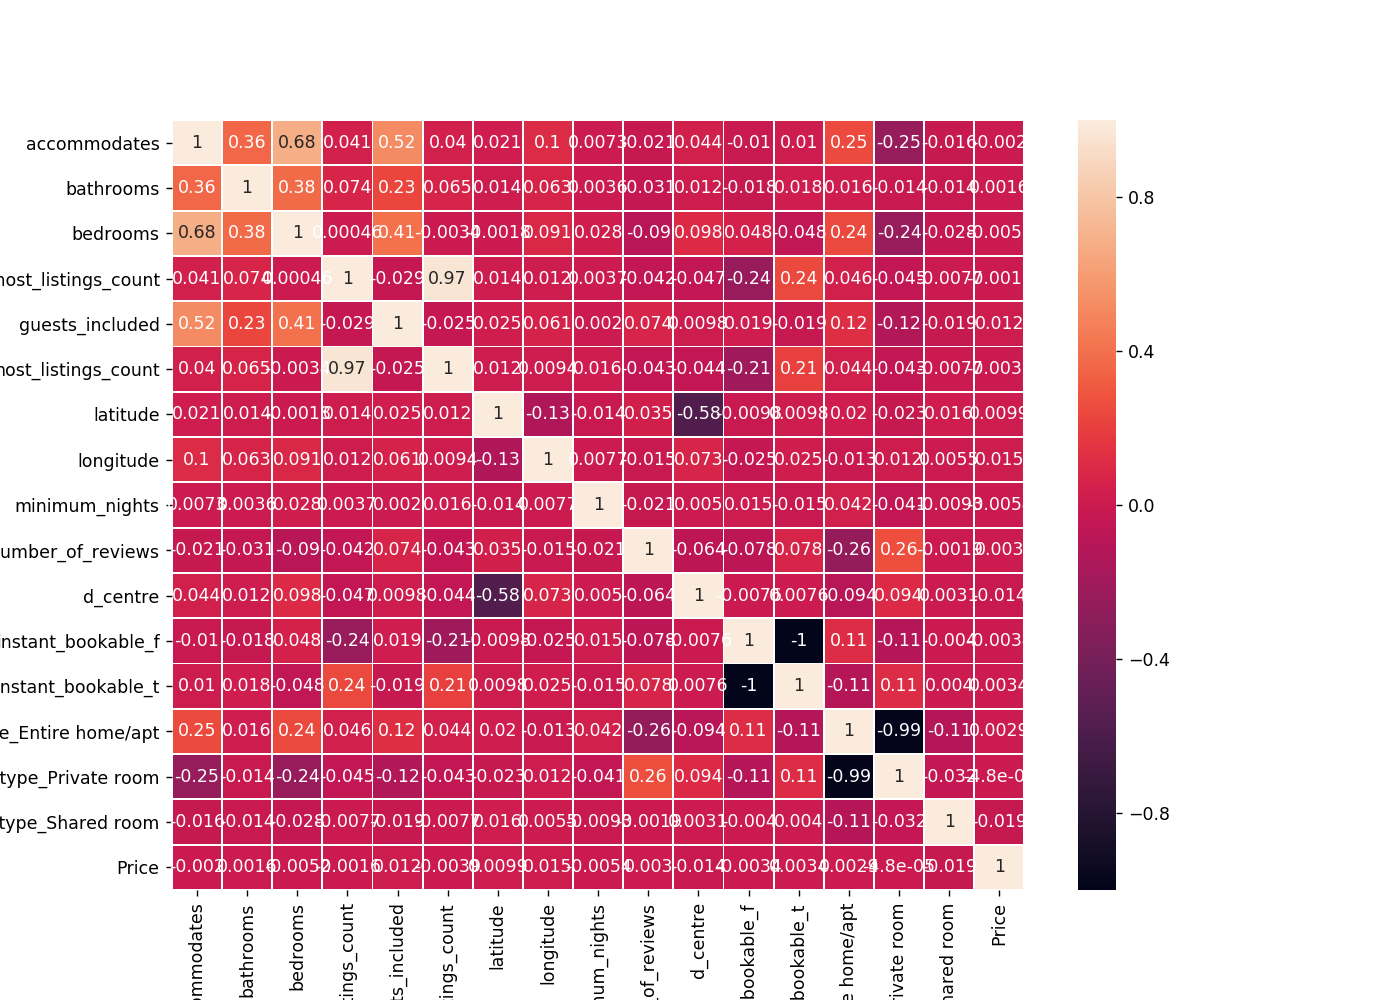

In [10]:
import seaborn as sns

#Mirem la correlació entre els atributs d'entrada per entendre millor les dades
#train_binary=train
#train_binary.head()
    
correlacio = train.corr()

plt.figure(figsize=(11,8))

ax = sns.heatmap(correlacio, annot=True, linewidths=.5)


In [11]:
#relacio = sns.pairplot(train)

Primer fem la predicció amb les dades no normalitzades

In [99]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
import matplotlib.pyplot as plt

In [100]:
#split by the most correlated features
X_Correlated_train =pd.DataFrame(X_train, columns=['longitude', 'guests_included', 'latitude', 'room_type_Shared room', 'd_centre'])
X_Correlated_test =pd.DataFrame(X_test, columns=['longitude', 'guests_included', 'latitude', 'room_type_Shared room', 'd_centre'])

print("shape correlated train: ", X_Correlated_train.shape)
print("shape correlated test: ", X_Correlated_test.shape)

X_Most_Correlated_train =pd.DataFrame(X_train, columns=['room_type_Shared room'])
X_Most_Correlated_test =pd.DataFrame(X_test, columns=['room_type_Shared room'])


shape correlated train:  (10497, 5)
shape correlated test:  (4499, 5)


1. Linear Regression multiple amb totes les dades, les que més correlacionen i la que més correlaciona.

In [101]:
# Linear regression with all features

linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)

y_train_predicted = linear_regression.predict(X_train)
y_test_predicted = linear_regression.predict(X_test) 

train_MSD = mean_squared_error(y_train, y_train_predicted)
train_R2 = r2_score(y_train, y_train_predicted)
test_MSD = mean_squared_error(y_test, y_test_predicted)
test_R2 = r2_score(y_test, y_test_predicted)


print("Error mitjà d'entrenament: ", train_MSD)
print("Error mitjà de test: ", test_MSD)
print("R2 d'entrenament: ", train_R2)
print("R2 de test: ", test_R2)


Error mitjà d'entrenament:  4059.9299955221477
Error mitjà de test:  4102.732010893084
R2 d'entrenament:  0.0012167583713048602
R2 de test:  -0.00290616487744777


In [105]:
# Linear regression with correlated features

linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_Correlated_train, y_train)

y_train_predicted_Correlated = linear_regression.predict(X_Correlated_train)
y_test_predicted_Correlated = linear_regression.predict(X_Correlated_test) 

train_MSD = mean_squared_error(y_train, y_train_predicted_Correlated)
train_R2 = r2_score(y_train, y_train_predicted_Correlated)
test_MSD = mean_squared_error(y_test, y_test_predicted_Correlated)
test_R2 = r2_score(y_test, y_test_predicted_Correlated)

print("Error mitjà d'entrenament: ", train_MSD)
print("Error mitjà de test: ", test_MSD)
print("R2 d'entrenament: ", train_R2)
print("R2 de test: ", test_R2)


Error mitjà d'entrenament:  4061.0384570514393
Error mitjà de test:  4097.2402595991525
R2 d'entrenament:  0.0009440657877708425
R2 de test:  -0.0015637152087795148


In [97]:
# Linear regression with the most correlated feature

linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_Most_Correlated_train, y_train)

y_train_predicted_Most_Correlated = linear_regression.predict(X_Most_Correlated_train)
y_test_predicted_Most_Correlated = linear_regression.predict(X_Most_Correlated_test) 

train_MSD = mean_squared_error(y_train, y_train_predicted_Most_Correlated)
train_R2 = r2_score(y_train, y_train_predicted_Most_Correlated)
test_MSD = mean_squared_error(y_test, y_test_predicted_Most_Correlated)
test_R2 = r2_score(y_test, y_test_predicted_Most_Correlated)

print("Error mitjà d'entrenament: ", train_MSD)
print("Error mitjà de test: ", test_MSD)
print("R2 d'entrenament: ", train_R2)
print("R2 de test: ", test_R2)


Error mitjà d'entrenament:  4063.3785989309526
Error mitjà de test:  4092.6517783808813
R2 d'entrenament:  0.0003683675627104144
R2 de test:  -0.0004420684404771169


In [106]:
df = y_test.assign(y_predicted=y_test_predicted, y_predicted_correlated=y_test_predicted_Correlated, y_predicted_most_correlated = y_test_predicted_Most_Correlated)
df = df.rename(columns={'59.0' : 'y_real'})
df

,y_real,y_predicted,y_predicted_correlated,y_predicted_most_correlated
0,148.000,129.399,129.316,129.805
1,134.000,131.024,130.784,129.805
2,195.000,128.535,131.668,129.805
3,80.000,123.359,124.308,129.805
4,120.000,131.011,130.606,129.805
5,99.000,127.345,127.887,129.805
6,60.000,129.083,128.482,129.805
7,280.000,130.350,129.151,129.805
8,275.000,129.567,130.966,129.805
9,189.000,122.029,123.680,129.805


<IPython.core.display.Javascript object>


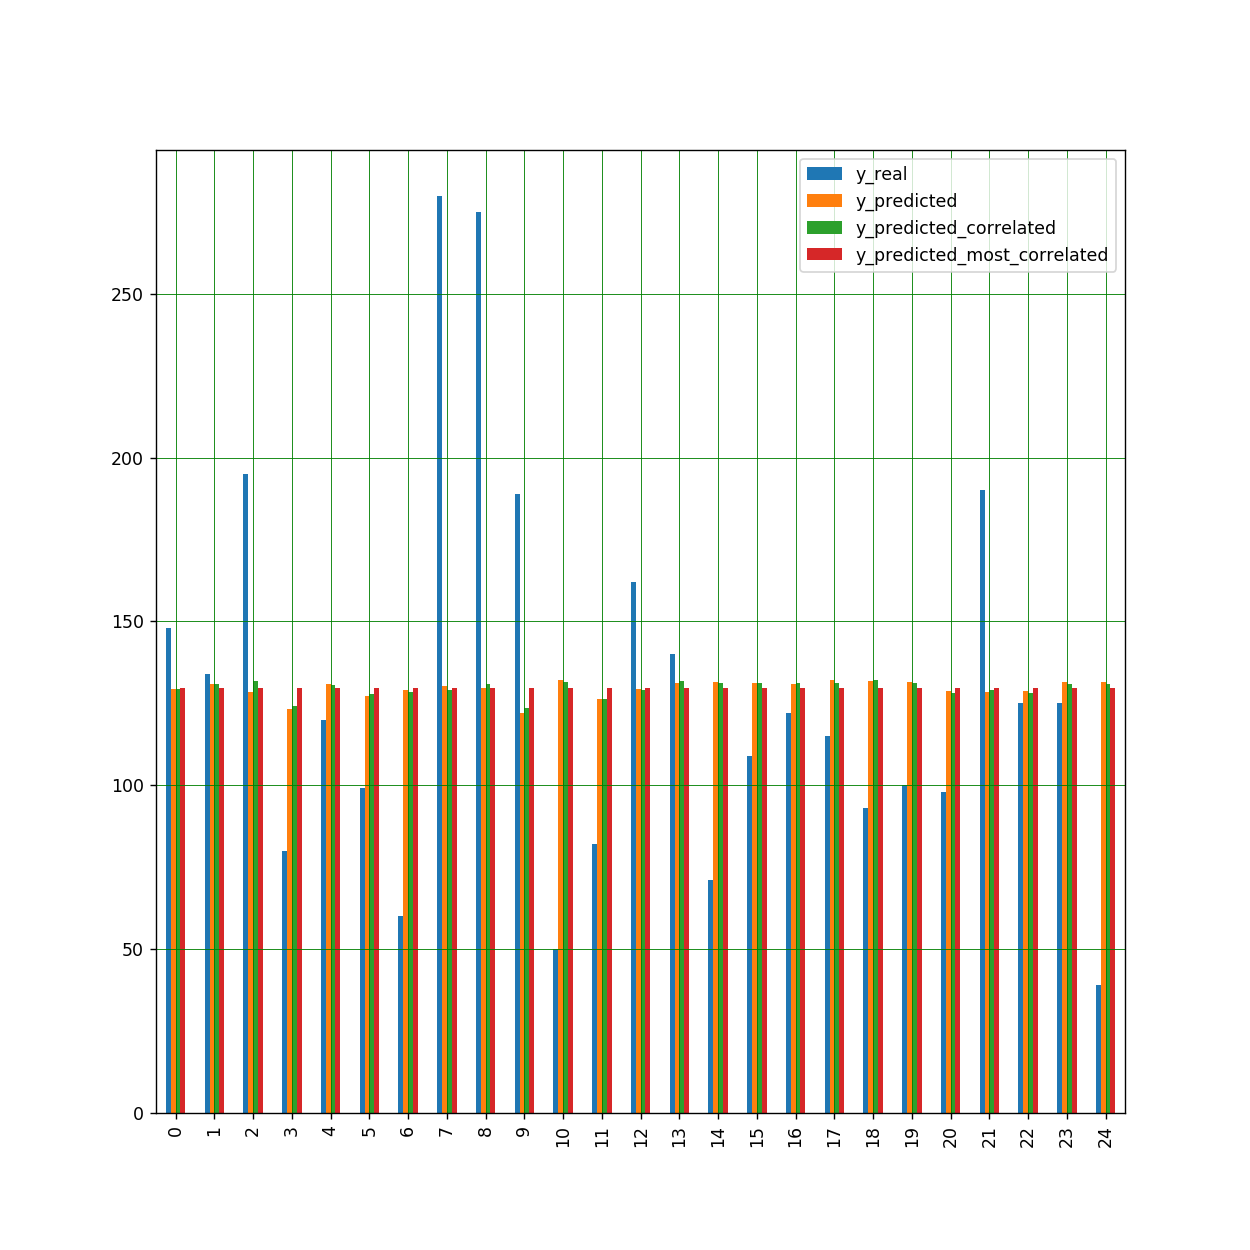

In [104]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

2. Multifeature polinomial regression

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [17]:
#Multi-featrues polinomial regression with all the featrues

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)
poly.fit(X_poly_train,y_train)

poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly_train, y_train)
poly_test_y_predicted = poly_reg_model.predict(X_poly_test)
poly_train_y_predicted = poly_reg_model.predict(X_poly_train)

poly_train_MSD = mean_squared_error(y_train, poly_train_y_predicted)
poly_train_R2 = r2_score(y_train, poly_train_y_predicted)
poly_test_MSD = mean_squared_error(y_test, poly_test_y_predicted)
poly_test_R2 = r2_score(y_test, poly_test_y_predicted)

print("Error mitjà d'entrenament: ", poly_train_MSD)
print("Error mitjà de test: ", poly_test_MSD)
print("R2 d'entrenament: ", poly_train_R2)
print("R2 de test: ", poly_test_R2)


Error mitjà d'entrenament:  4027.3645544316505
Error mitjà de test:  4133.444351551199
R2 d'entrenament:  0.00922818143852755
R2 de test:  -0.010413746582043304


In [107]:
#Multi-featrues polinomial regression with correlated featrues

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_Correlated_train)
X_poly_test = poly.fit_transform(X_Correlated_test)
poly.fit(X_poly_train,y_train)

poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly_train, y_train)
poly_test_y_predicted_Correlated = poly_reg_model.predict(X_poly_test)
poly_train_y_predicted_Correlated = poly_reg_model.predict(X_poly_train)

poly_train_MSD = mean_squared_error(y_train, poly_train_y_predicted_Correlated)
poly_train_R2 = r2_score(y_train, poly_train_y_predicted_Correlated)
poly_test_MSD = mean_squared_error(y_test, poly_test_y_predicted_Correlated)
poly_test_R2 = r2_score(y_test, poly_test_y_predicted_Correlated)

print("Error mitjà d'entrenament: ", poly_train_MSD)
print("Error mitjà de test: ", poly_test_MSD)
print("R2 d'entrenament: ", poly_train_R2)
print("R2 de test: ", poly_test_R2)



Error mitjà d'entrenament:  4058.0030998577786
Error mitjà de test:  4105.4640064505975
R2 d'entrenament:  0.0016907939088786073
R2 de test:  -0.0035739967464980538


In [109]:
#Multi-featrues polinomial regression with the most correlated featrue

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_Most_Correlated_train)
X_poly_test = poly.fit_transform(X_Most_Correlated_test)
poly.fit(X_poly_train,y_train)

poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly_train, y_train)
poly_test_y_predicted_Most_Correlated = poly_reg_model.predict(X_poly_test)
poly_train_y_predicted_Most_Correlated = poly_reg_model.predict(X_poly_train)

poly_train_MSD = mean_squared_error(y_train, poly_train_y_predicted_Most_Correlated)
poly_train_R2 = r2_score(y_train, poly_train_y_predicted_Most_Correlated)
poly_test_MSD = mean_squared_error(y_test, poly_test_y_predicted_Most_Correlated)
poly_test_R2 = r2_score(y_test, poly_test_y_predicted_Most_Correlated)

print("Error mitjà d'entrenament: ", poly_train_MSD)
print("Error mitjà de test: ", poly_test_MSD)
print("R2 d'entrenament: ", poly_train_R2)
print("R2 de test: ", poly_test_R2)


Error mitjà d'entrenament:  4063.3785989309526
Error mitjà de test:  4092.6517783808813
R2 d'entrenament:  0.0003683675627104144
R2 de test:  -0.0004420684404771169


In [110]:
df = y_test.assign(y_predicted=poly_test_y_predicted, y_predicted_correlated=poly_test_y_predicted_Correlated, y_predicted_most_correlated = poly_test_y_predicted_Most_Correlated)
df = df.rename(columns={'59.0' : 'y_real'})
df

,y_real,y_predicted,y_predicted_correlated,y_predicted_most_correlated
0,148.000,129.805,127.589,129.805
1,134.000,129.805,131.536,129.805
2,195.000,129.805,130.667,129.805
3,80.000,129.805,122.563,129.805
4,120.000,129.805,128.864,129.805
5,99.000,129.805,128.701,129.805
6,60.000,129.805,128.999,129.805
7,280.000,129.805,128.416,129.805
8,275.000,129.805,131.398,129.805
9,189.000,129.805,120.465,129.805


<IPython.core.display.Javascript object>


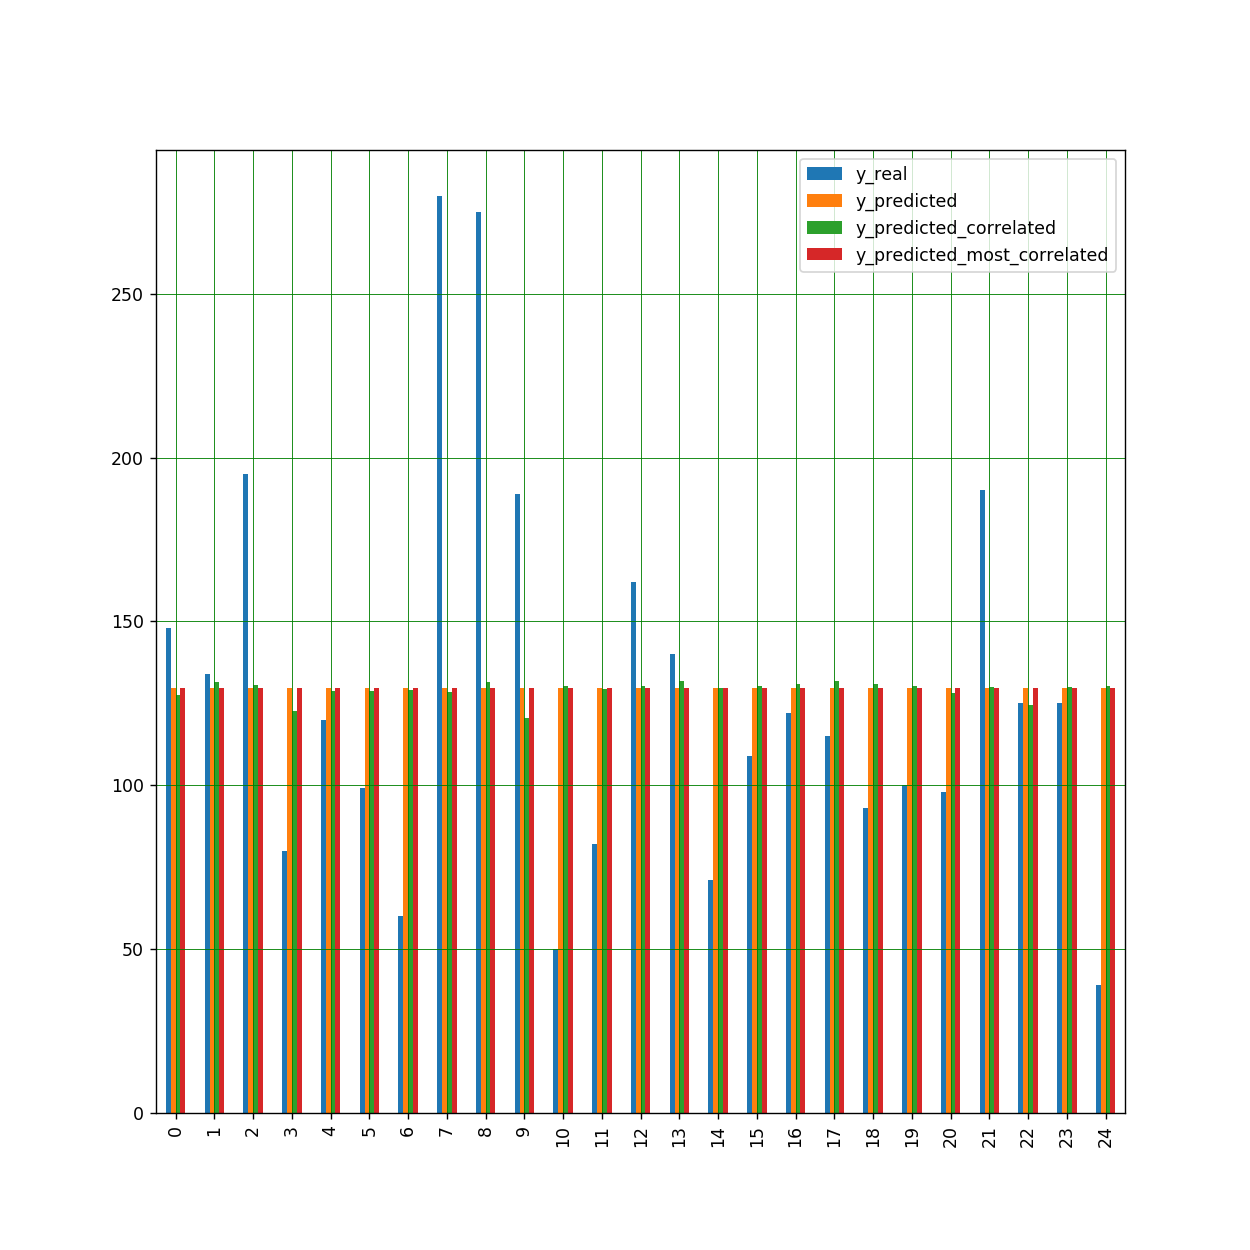

In [111]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

El resultat obtingut és amb polinomis de grau 2, i veiem que és pitjor que amb un regressor lineal. I si augmentem els graus pitjor és el resultat fins al punt que no es pot calcular (grau 4)

3. KNN regressor

In [21]:
from sklearn.neighbors import KNeighborsRegressor
accuracy_test=[]
accuracy_train=[]
test_MSD=[]
train_MSD=[]
num=[]
for i in range(1,50,2):
    KNN = KNeighborsRegressor(n_neighbors=i)
    KNN.fit(X_train, y_train) 
    test_predicted = KNN.predict(X_test)
    train_predicted = KNN.predict(X_train)
    num.append(i)
    test_MSD.append(mean_squared_error(y_test, test_predicted))
    train_MSD.append(mean_squared_error(y_train, train_predicted))
    #accuracy_train.append(KNN.score(X_train, y_train))
    #accuracy_test.append(KNN.score(X_test, y_test))
   # print("Error mitjà d'entrenament per", i ,"veins: ", train_MSD[i-1])
    #print("Error mitjà de test per", i ,"veins: ", test_MSD[i-1])
  #  print("Accuracy d'entrenament per",i,"veins:",accuracy_train[i-1])
 #   print("Accuracy de test per",i,"veins:",accuracy_test[i-1])

In [22]:
plt.figure()
plt.title('KNN Error')
plt.plot(num, test_MSD, label = 'Testing Error')
plt.plot(num, train_MSD, label = 'Training Error')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Error')
plt.show()

<IPython.core.display.Javascript object>

Random Forest

In [23]:
from sklearn.ensemble import RandomForestRegressor


C:\Users\cfrag\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Error mitjà d'entrenament:  871.4246365628275
Error mitjà de test:  4782.922829517671
R2 d'entrenament:  0.7856208544725435
R2 de test:  -0.16917770381307062


<IPython.core.display.Javascript object>


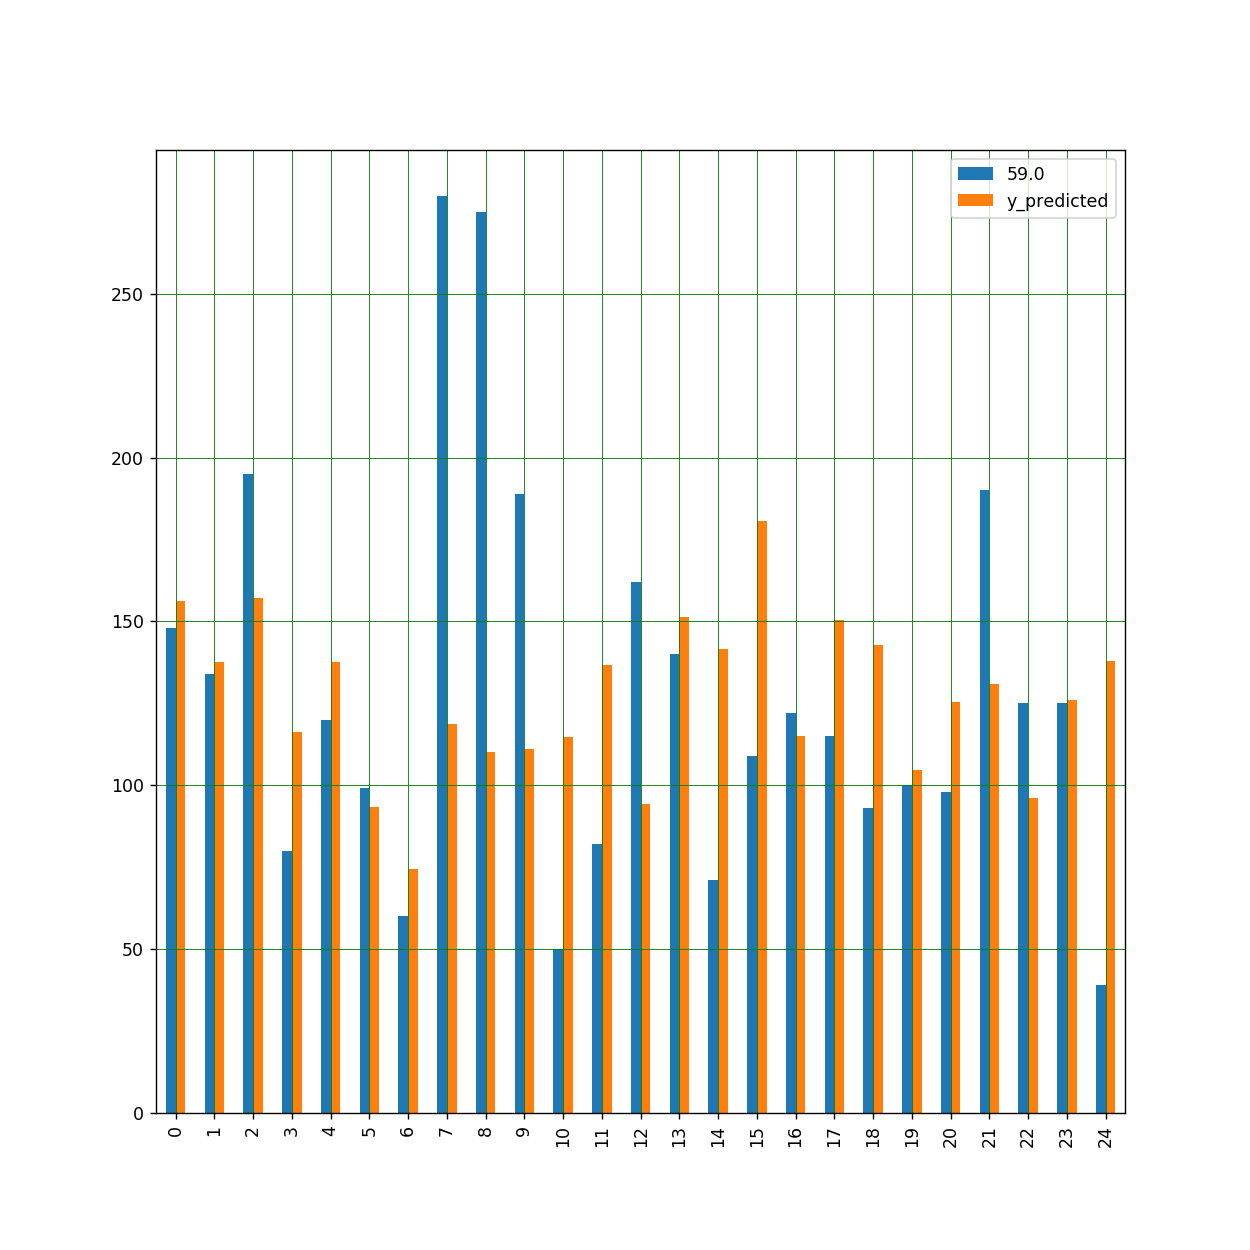

In [29]:
random_forest = RandomForestRegressor() 
random_forest.fit(X_train, y_train)
test_predicted = random_forest.predict(X_test) 
train_predicted = random_forest.predict(X_train) 
test_predicted=test_predicted.reshape(-1,1)
train_predicted=train_predicted.reshape(-1,1)

train_MSD = mean_squared_error(y_train, train_predicted)
train_R2 = r2_score(y_train, train_predicted)
test_MSD = mean_squared_error(y_test, test_predicted)
test_R2 = r2_score(y_test, test_predicted)

print("Error mitjà d'entrenament: ", train_MSD)
print("Error mitjà de test: ", test_MSD)
print("R2 d'entrenament: ", train_R2)
print("R2 de test: ", test_R2)


df = y_test.assign(y_predicted=test_predicted)
df = df.rename(columns={'160.0' : 'y_real'})

df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()



In [31]:
# importing Pool
from catboost import Pool, CatBoostRegressor
#Creating pool object for train dataset. we give information of categorical fetures to parameter cat_fetaures
train_data = Pool(data=X_train,label=y_train)
#Creating pool object for test dataset
test_data = Pool(data=X_test,label=y_test)

In [32]:
#build model
cat_model = CatBoostRegressor(loss_function="RMSE")
# Fit model 
cat_model.fit( X_train, y_train,eval_set=(X_test, y_test),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.073655
0:	learn: 63.7492433	test: 63.9698920	best: 63.9698920 (0)	total: 66.1ms	remaining: 1m 6s
1:	learn: 63.7307246	test: 63.9722477	best: 63.9698920 (0)	total: 70.2ms	remaining: 35s
2:	learn: 63.7219178	test: 63.9758565	best: 63.9698920 (0)	total: 75ms	remaining: 24.9s
3:	learn: 63.7015739	test: 63.9825380	best: 63.9698920 (0)	total: 79.6ms	remaining: 19.8s
4:	learn: 63.6856043	test: 63.9817930	best: 63.9698920 (0)	total: 84ms	remaining: 16.7s
5:	learn: 63.6572484	test: 63.9963120	best: 63.9698920 (0)	total: 88.1ms	remaining: 14.6s
6:	learn: 63.6460991	test: 63.9937296	best: 63.9698920 (0)	total: 92.1ms	remaining: 13.1s
7:	learn: 63.6274510	test: 63.9979360	best: 63.9698920 (0)	total: 95.9ms	remaining: 11.9s
8:	learn: 63.5988391	test: 63.9960505	best: 63.9698920 (0)	total: 100ms	remaining: 11s
9:	learn: 63.5907632	test: 63.9953751	best: 63.9698920 (0)	total: 104ms	remaining: 10.3s
10:	learn: 63.5825600	test: 63.9956602	best: 63.9698920 (0)	total: 108ms	remaini

105:	learn: 62.5601626	test: 64.1035929	best: 63.9698920 (0)	total: 492ms	remaining: 4.15s
106:	learn: 62.5442563	test: 64.1067944	best: 63.9698920 (0)	total: 496ms	remaining: 4.14s
107:	learn: 62.5378392	test: 64.1038828	best: 63.9698920 (0)	total: 500ms	remaining: 4.13s
108:	learn: 62.5323857	test: 64.1059290	best: 63.9698920 (0)	total: 504ms	remaining: 4.12s
109:	learn: 62.5220857	test: 64.1043630	best: 63.9698920 (0)	total: 508ms	remaining: 4.11s
110:	learn: 62.5145191	test: 64.1090101	best: 63.9698920 (0)	total: 511ms	remaining: 4.09s
111:	learn: 62.5013485	test: 64.1112395	best: 63.9698920 (0)	total: 516ms	remaining: 4.09s
112:	learn: 62.4952842	test: 64.1158348	best: 63.9698920 (0)	total: 519ms	remaining: 4.08s
113:	learn: 62.4815634	test: 64.1162324	best: 63.9698920 (0)	total: 523ms	remaining: 4.07s
114:	learn: 62.4716595	test: 64.1208827	best: 63.9698920 (0)	total: 527ms	remaining: 4.05s
115:	learn: 62.4588795	test: 64.1283437	best: 63.9698920 (0)	total: 531ms	remaining: 4.05s

208:	learn: 61.2174738	test: 64.2812788	best: 63.9698920 (0)	total: 998ms	remaining: 3.78s
209:	learn: 61.1965253	test: 64.2857941	best: 63.9698920 (0)	total: 1s	remaining: 3.78s
210:	learn: 61.1847844	test: 64.2838365	best: 63.9698920 (0)	total: 1.01s	remaining: 3.78s
211:	learn: 61.1666728	test: 64.2857806	best: 63.9698920 (0)	total: 1.02s	remaining: 3.78s
212:	learn: 61.1470099	test: 64.2887496	best: 63.9698920 (0)	total: 1.02s	remaining: 3.78s
213:	learn: 61.1415650	test: 64.2894846	best: 63.9698920 (0)	total: 1.03s	remaining: 3.78s
214:	learn: 61.1300992	test: 64.2901210	best: 63.9698920 (0)	total: 1.04s	remaining: 3.78s
215:	learn: 61.1052480	test: 64.2858716	best: 63.9698920 (0)	total: 1.04s	remaining: 3.79s
216:	learn: 61.1024290	test: 64.2847995	best: 63.9698920 (0)	total: 1.05s	remaining: 3.79s
217:	learn: 61.0884325	test: 64.2849478	best: 63.9698920 (0)	total: 1.06s	remaining: 3.79s
218:	learn: 61.0794876	test: 64.2885973	best: 63.9698920 (0)	total: 1.06s	remaining: 3.79s
21

303:	learn: 60.0555314	test: 64.4043897	best: 63.9698920 (0)	total: 1.5s	remaining: 3.44s
304:	learn: 60.0435890	test: 64.4089111	best: 63.9698920 (0)	total: 1.51s	remaining: 3.44s
305:	learn: 60.0270601	test: 64.4073461	best: 63.9698920 (0)	total: 1.51s	remaining: 3.44s
306:	learn: 60.0093603	test: 64.4113923	best: 63.9698920 (0)	total: 1.52s	remaining: 3.44s
307:	learn: 59.9906115	test: 64.4098983	best: 63.9698920 (0)	total: 1.53s	remaining: 3.43s
308:	learn: 59.9804267	test: 64.4121564	best: 63.9698920 (0)	total: 1.53s	remaining: 3.43s
309:	learn: 59.9668723	test: 64.4125619	best: 63.9698920 (0)	total: 1.54s	remaining: 3.43s
310:	learn: 59.9553623	test: 64.4110196	best: 63.9698920 (0)	total: 1.55s	remaining: 3.43s
311:	learn: 59.9402826	test: 64.4070911	best: 63.9698920 (0)	total: 1.55s	remaining: 3.43s
312:	learn: 59.9353408	test: 64.4072389	best: 63.9698920 (0)	total: 1.56s	remaining: 3.42s
313:	learn: 59.9197923	test: 64.4125335	best: 63.9698920 (0)	total: 1.57s	remaining: 3.42s


406:	learn: 58.8975770	test: 64.5631830	best: 63.9698920 (0)	total: 2.18s	remaining: 3.18s
407:	learn: 58.8884818	test: 64.5668970	best: 63.9698920 (0)	total: 2.19s	remaining: 3.17s
408:	learn: 58.8795930	test: 64.5673221	best: 63.9698920 (0)	total: 2.19s	remaining: 3.17s
409:	learn: 58.8667419	test: 64.5700615	best: 63.9698920 (0)	total: 2.2s	remaining: 3.17s
410:	learn: 58.8588345	test: 64.5734165	best: 63.9698920 (0)	total: 2.21s	remaining: 3.17s
411:	learn: 58.8479112	test: 64.5743769	best: 63.9698920 (0)	total: 2.21s	remaining: 3.16s
412:	learn: 58.8363756	test: 64.5812413	best: 63.9698920 (0)	total: 2.22s	remaining: 3.15s
413:	learn: 58.8194549	test: 64.5832000	best: 63.9698920 (0)	total: 2.22s	remaining: 3.15s
414:	learn: 58.8047225	test: 64.5876490	best: 63.9698920 (0)	total: 2.23s	remaining: 3.14s
415:	learn: 58.7918757	test: 64.5892578	best: 63.9698920 (0)	total: 2.23s	remaining: 3.14s
416:	learn: 58.7785189	test: 64.5894750	best: 63.9698920 (0)	total: 2.24s	remaining: 3.13s


509:	learn: 57.8168905	test: 64.7464109	best: 63.9698920 (0)	total: 2.88s	remaining: 2.76s
510:	learn: 57.8112677	test: 64.7523735	best: 63.9698920 (0)	total: 2.88s	remaining: 2.76s
511:	learn: 57.8064753	test: 64.7521060	best: 63.9698920 (0)	total: 2.89s	remaining: 2.75s
512:	learn: 57.8031848	test: 64.7545725	best: 63.9698920 (0)	total: 2.9s	remaining: 2.75s
513:	learn: 57.7925182	test: 64.7587501	best: 63.9698920 (0)	total: 2.9s	remaining: 2.75s
514:	learn: 57.7822092	test: 64.7591528	best: 63.9698920 (0)	total: 2.91s	remaining: 2.74s
515:	learn: 57.7667864	test: 64.7598033	best: 63.9698920 (0)	total: 2.92s	remaining: 2.74s
516:	learn: 57.7663377	test: 64.7591872	best: 63.9698920 (0)	total: 2.92s	remaining: 2.73s
517:	learn: 57.7588242	test: 64.7629528	best: 63.9698920 (0)	total: 2.93s	remaining: 2.73s
518:	learn: 57.7430987	test: 64.7625177	best: 63.9698920 (0)	total: 2.94s	remaining: 2.72s
519:	learn: 57.7386432	test: 64.7672733	best: 63.9698920 (0)	total: 2.94s	remaining: 2.72s
5

613:	learn: 56.8853434	test: 64.9058766	best: 63.9698920 (0)	total: 3.54s	remaining: 2.23s
614:	learn: 56.8676579	test: 64.9085052	best: 63.9698920 (0)	total: 3.55s	remaining: 2.22s
615:	learn: 56.8581467	test: 64.9149155	best: 63.9698920 (0)	total: 3.56s	remaining: 2.22s
616:	learn: 56.8506577	test: 64.9174437	best: 63.9698920 (0)	total: 3.56s	remaining: 2.21s
617:	learn: 56.8348569	test: 64.9247063	best: 63.9698920 (0)	total: 3.57s	remaining: 2.21s
618:	learn: 56.8286182	test: 64.9230482	best: 63.9698920 (0)	total: 3.58s	remaining: 2.2s
619:	learn: 56.8169648	test: 64.9292743	best: 63.9698920 (0)	total: 3.59s	remaining: 2.2s
620:	learn: 56.8128034	test: 64.9293214	best: 63.9698920 (0)	total: 3.64s	remaining: 2.22s
621:	learn: 56.8009777	test: 64.9276595	best: 63.9698920 (0)	total: 3.65s	remaining: 2.22s
622:	learn: 56.7966671	test: 64.9311942	best: 63.9698920 (0)	total: 3.66s	remaining: 2.21s
623:	learn: 56.7894262	test: 64.9333723	best: 63.9698920 (0)	total: 3.66s	remaining: 2.21s
6

716:	learn: 56.0438416	test: 65.0373731	best: 63.9698920 (0)	total: 4.22s	remaining: 1.66s
717:	learn: 56.0359496	test: 65.0346542	best: 63.9698920 (0)	total: 4.22s	remaining: 1.66s
718:	learn: 56.0245750	test: 65.0382073	best: 63.9698920 (0)	total: 4.23s	remaining: 1.65s
719:	learn: 56.0199733	test: 65.0382388	best: 63.9698920 (0)	total: 4.24s	remaining: 1.65s
720:	learn: 56.0077211	test: 65.0458956	best: 63.9698920 (0)	total: 4.24s	remaining: 1.64s
721:	learn: 56.0027294	test: 65.0444196	best: 63.9698920 (0)	total: 4.25s	remaining: 1.64s
722:	learn: 55.9912292	test: 65.0479976	best: 63.9698920 (0)	total: 4.26s	remaining: 1.63s
723:	learn: 55.9829149	test: 65.0477739	best: 63.9698920 (0)	total: 4.26s	remaining: 1.63s
724:	learn: 55.9761127	test: 65.0523728	best: 63.9698920 (0)	total: 4.27s	remaining: 1.62s
725:	learn: 55.9610406	test: 65.0551989	best: 63.9698920 (0)	total: 4.28s	remaining: 1.61s
726:	learn: 55.9577372	test: 65.0586066	best: 63.9698920 (0)	total: 4.28s	remaining: 1.61s

812:	learn: 55.3017014	test: 65.1879709	best: 63.9698920 (0)	total: 4.92s	remaining: 1.13s
813:	learn: 55.2936203	test: 65.1898122	best: 63.9698920 (0)	total: 4.92s	remaining: 1.13s
814:	learn: 55.2797649	test: 65.1915369	best: 63.9698920 (0)	total: 4.93s	remaining: 1.12s
815:	learn: 55.2666580	test: 65.1964713	best: 63.9698920 (0)	total: 4.94s	remaining: 1.11s
816:	learn: 55.2628150	test: 65.1959846	best: 63.9698920 (0)	total: 4.95s	remaining: 1.11s
817:	learn: 55.2613148	test: 65.1973054	best: 63.9698920 (0)	total: 4.95s	remaining: 1.1s
818:	learn: 55.2538277	test: 65.1943379	best: 63.9698920 (0)	total: 4.96s	remaining: 1.1s
819:	learn: 55.2422505	test: 65.1946996	best: 63.9698920 (0)	total: 4.97s	remaining: 1.09s
820:	learn: 55.2342756	test: 65.1973626	best: 63.9698920 (0)	total: 4.97s	remaining: 1.08s
821:	learn: 55.2314005	test: 65.1981599	best: 63.9698920 (0)	total: 4.98s	remaining: 1.08s
822:	learn: 55.2259140	test: 65.1987431	best: 63.9698920 (0)	total: 4.99s	remaining: 1.07s
8

906:	learn: 54.5685280	test: 65.2788953	best: 63.9698920 (0)	total: 5.59s	remaining: 574ms
907:	learn: 54.5635554	test: 65.2815807	best: 63.9698920 (0)	total: 5.6s	remaining: 568ms
908:	learn: 54.5556579	test: 65.2839024	best: 63.9698920 (0)	total: 5.61s	remaining: 562ms
909:	learn: 54.5484841	test: 65.2877746	best: 63.9698920 (0)	total: 5.62s	remaining: 555ms
910:	learn: 54.5389419	test: 65.2904016	best: 63.9698920 (0)	total: 5.62s	remaining: 549ms
911:	learn: 54.5329104	test: 65.2915734	best: 63.9698920 (0)	total: 5.63s	remaining: 543ms
912:	learn: 54.5271334	test: 65.2945549	best: 63.9698920 (0)	total: 5.63s	remaining: 537ms
913:	learn: 54.5187581	test: 65.2958721	best: 63.9698920 (0)	total: 5.64s	remaining: 531ms
914:	learn: 54.5032520	test: 65.2913440	best: 63.9698920 (0)	total: 5.65s	remaining: 525ms
915:	learn: 54.4954918	test: 65.2950566	best: 63.9698920 (0)	total: 5.66s	remaining: 519ms
916:	learn: 54.4857471	test: 65.2933062	best: 63.9698920 (0)	total: 5.66s	remaining: 513ms


In [33]:
from sklearn.metrics import r2_score
y_predict= cat_model.predict(X_test)
#RMSE
MSE_test = mean_squared_error(y_test,y_predict)
#R2 Score
r2_test = r2_score(y_test,y_predict)
# Adjusted R2 Score
#n= X.train.shape[0] # total no of datapoints
#p= X.train.shape[1] # total no of independent features
#adj_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
#print results
print("Evaluation on test data")
print("RMSE: {:.2f}".format(MSE_test))
print("R2: {:.2f}".format(r2_test))
#print("Adjusted R2: {:.2f}".format(adj_r2_test))

Evaluation on test data
RMSE: 4092.15
R2: -0.00


Ara provarem els matiexos models però estandarditzant les dades per veure si hi ha algun canvi significatiu

In [35]:
from pandas import DataFrame
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
X_train_scaled = scaler.fit_transform(X_train)
y_train_scaled = scaler.fit_transform(y_train)
X_train_scaled=DataFrame(X_train_scaled, columns=["accommodates", "bathrooms", "bedrooms", "host_listings_count", "guests_included", "host_listings_count", "latitude", "longitude", "minimum_nights", "number_of_reviews", "d_centre", "instant_bookable_f", "instant_bookabled_t", "room_type_Entire home/apt", "type_Private room", "type_Shared room"])
y_train_scaled=DataFrame(y_train_scaled, columns=["Price"])
X_test_scaled = scaler.fit_transform(X_test)
y_test_scaled = scaler.fit_transform(y_test)
X_test_scaled=DataFrame(X_test_scaled, columns=["accommodates", "bathrooms", "bedrooms", "host_listings_count", "guests_included", "host_listings_count", "latitude", "longitude", "minimum_nights", "number_of_reviews", "d_centre", "instant_bookable_f", "instant_bookabled_t", "room_type_Entire home/apt", "type_Private room", "type_Shared room"])
y_test_scaled=DataFrame(y_test_scaled, columns=["Price"])

In [36]:

from sklearn.preprocessing import StandardScaler
# define min max scaler
scaler = StandardScaler()
# transform data
X_train_scaled2 = scaler.fit_transform(X_train)
y_train_scaled2 = scaler.fit_transform(y_train)
X_train_scaled2=DataFrame(X_train_scaled2, columns=["accommodates", "bathrooms", "bedrooms", "host_listings_count", "guests_included", "host_listings_count", "latitude", "longitude", "minimum_nights", "number_of_reviews", "d_centre", "instant_bookable_f", "instant_bookabled_t", "room_type_Entire home/apt", "type_Private room", "type_Shared room"])
y_train_scaled2=DataFrame(y_train_scaled2, columns=["Price"])
X_test_scaled2 = scaler.fit_transform(X_test)
y_test_scaled2 = scaler.fit_transform(y_test)
X_test_scaled2=DataFrame(X_test_scaled2, columns=["accommodates", "bathrooms", "bedrooms", "host_listings_count", "guests_included", "host_listings_count", "latitude", "longitude", "minimum_nights", "number_of_reviews", "d_centre", "instant_bookable_f", "instant_bookabled_t", "room_type_Entire home/apt", "type_Private room", "type_Shared room"])
y_test_scaled2=DataFrame(y_test_scaled2, columns=["Price"])

Error mitjà d'entrenament:  0.02290626884029174
Error mitjà de test:  0.024400196074427775
R2 d'entrenament:  0.0012167583713046382
R2 de test:  -0.0026472816369289554


<IPython.core.display.Javascript object>


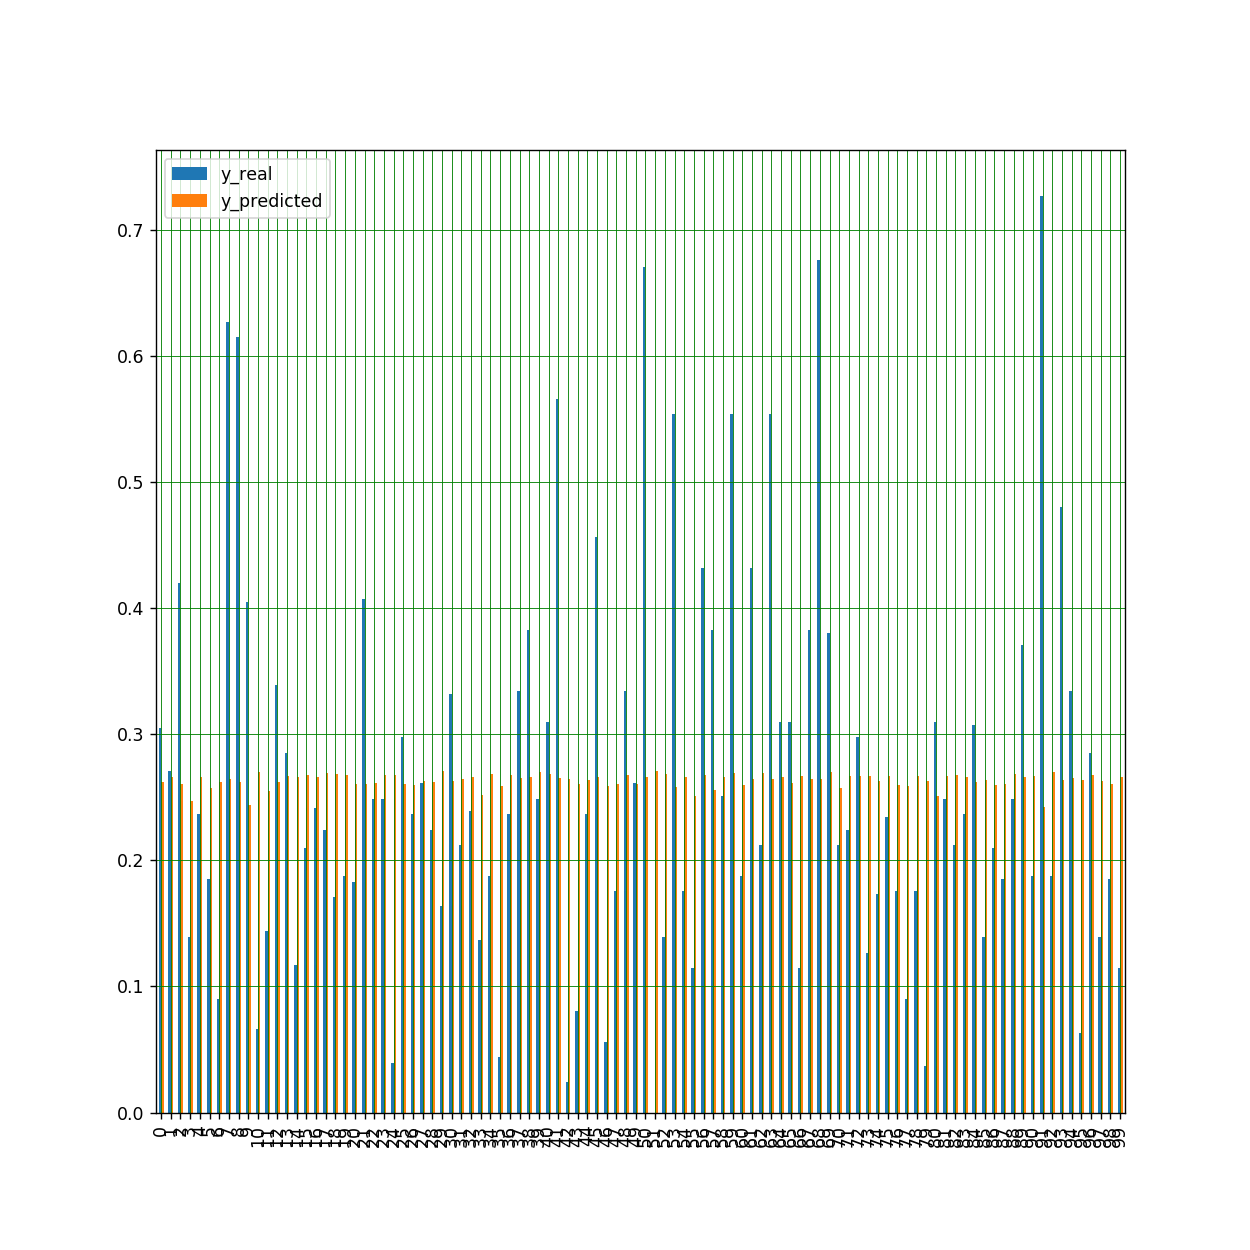

In [37]:
# Linear regression with all features
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train_scaled, y_train_scaled)

y_train_predicted = linear_regression.predict(X_train_scaled)
y_test_predicted = linear_regression.predict(X_test_scaled) 

train_MSD = mean_squared_error(y_train_scaled, y_train_predicted)
train_R2 = r2_score(y_train_scaled, y_train_predicted)
test_MSD = mean_squared_error(y_test_scaled, y_test_predicted)
test_R2 = r2_score(y_test_scaled, y_test_predicted)

print("Error mitjà d'entrenament: ", train_MSD)
print("Error mitjà de test: ", test_MSD)
print("R2 d'entrenament: ", train_R2)
print("R2 de test: ", test_R2)


#df = pd.DataFrame({'Actual': y_train, 'Predicted': y_train_predicted}, index=range(len(y_train)))
df = y_test_scaled.assign(y_predicted=y_test_predicted)
df = df.rename(columns={'Price' : 'y_real'})
DataFrame(df)


df1 = df.head(100)
df1.plot(kind='bar',figsize=(10,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


In [67]:
#Multi-featrues polinomial regression with the most correlated featrues
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_train_scaled)
X_poly_test = poly.fit_transform(X_test_scaled)
poly.fit(X_poly_train,y_train)

poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly_train, y_train_scaled)
poly_test_y_predicted = poly_reg_model.predict(X_poly_test)
poly_train_y_predicted = poly_reg_model.predict(X_poly_train)

poly_test_MSD = mean_squared_error(y_test_scaled, poly_test_y_predicted)
poly_train_MSD = mean_squared_error(y_train_scaled, poly_train_y_predicted)
print("Error mitjà d'entrenament: ", poly_train_MSD)
print("Error mitjà de test: ",poly_test_MSD)

poly_train_MSD = mean_squared_error(y_train_scaled, poly_train_y_predicted)
poly_train_R2 = r2_score(y_train_scaled, poly_train_y_predicted)
poly_test_MSD = mean_squared_error(y_test_scaled, poly_test_y_predicted)
poly_test_R2 = r2_score(y_test_scaled, poly_test_y_predicted)

print("Error mitjà d'entrenament: ", poly_train_MSD)
print("Error mitjà de test: ", poly_test_MSD)
print("R2 d'entrenament: ", poly_train_R2)
print("R2 de test: ", poly_test_R2)


Error mitjà d'entrenament:  0.022722536213862887
Error mitjà de test:  3.551452126502394
Error mitjà d'entrenament:  0.022722536213862887
Error mitjà de test:  3.551452126502394
R2 d'entrenament:  0.009228061717870384
R2 de test:  -144.93545927416585


KNN

In [38]:
from sklearn.neighbors import KNeighborsRegressor
R2_test=[]
R2_train=[]
test_MSD=[]
train_MSD=[]
num=[]
for i in range(1,50,2):
    KNN = KNeighborsRegressor(n_neighbors=i)
    KNN.fit(X_train_scaled, y_train_scaled) 
    test_predicted = KNN.predict(X_test_scaled)
    train_predicted = KNN.predict(X_train_scaled)
    num.append(i)
    test_MSD.append(mean_squared_error(y_test_scaled, test_predicted))
    train_MSD.append(mean_squared_error(y_train_scaled, train_predicted))
    R2_test.append(r2_score(y_test_scaled, test_predicted))
    R2_train.append(r2_score(y_train_scaled, train_predicted))
    #accuracy_train.append(KNN.score(X_train, y_train))
    #accuracy_test.append(KNN.score(X_test, y_test))
   # print("Error mitjà d'entrenament per", i ,"veins: ", train_MSD[i-1])
    #print("Error mitjà de test per", i ,"veins: ", test_MSD[i-1])
  #  print("Accuracy d'entrenament per",i,"veins:",accuracy_train[i-1])
 #   print("Accuracy de test per",i,"veins:",accuracy_test[i-1])

In [39]:
R2_train

[1.0,
 0.3328871004188114,
 0.18531673833900064,
 0.1299726523997876,
 0.09843386407519228,
 0.08550799131252096,
 0.07246946723958791,
 0.06480575088240481,
 0.06061036772028239,
 0.053813912390968555,
 0.04836226826512102,
 0.04241590979395671,
 0.04019989033342275,
 0.038085470199914484,
 0.03408302089666404,
 0.03184811522803621,
 0.030280736247619622,
 0.028831175628489802,
 0.02646665398111625,
 0.02592822875524947,
 0.024719177778186552,
 0.024083548925254106,
 0.022714567075376113,
 0.02194196703884954,
 0.02176740431599289]

<IPython.core.display.Javascript object>


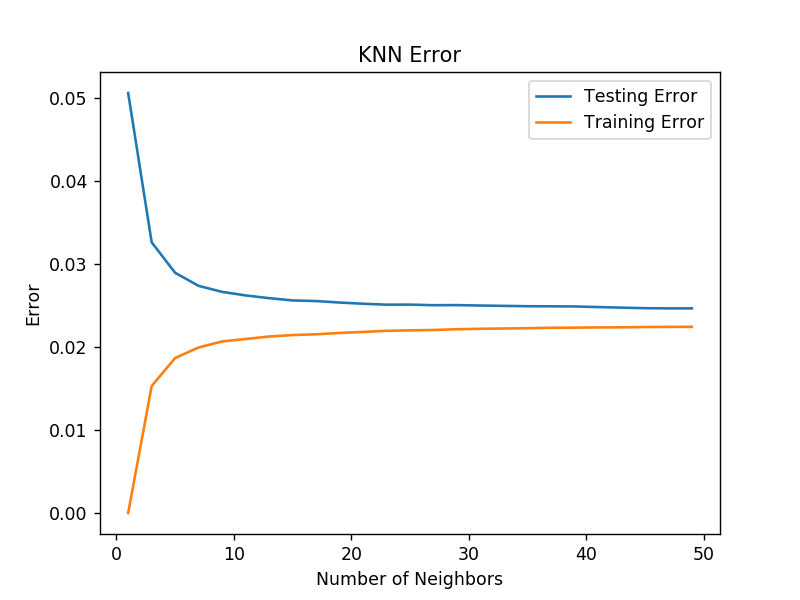

In [40]:
plt.figure()
plt.title('KNN Error')
plt.plot(num, test_MSD, label = 'Testing Error')
plt.plot(num, train_MSD, label = 'Training Error')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Error')
plt.show()

<IPython.core.display.Javascript object>


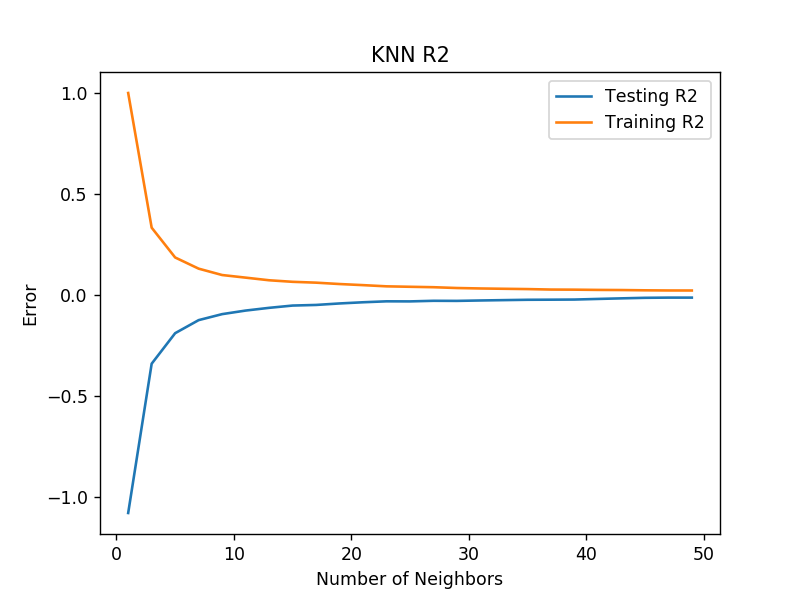

In [79]:
plt.figure()
plt.title('KNN R2')
plt.plot(num, R2_test, label = 'Testing R2')
plt.plot(num, R2_train, label = 'Training R2')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Error')
plt.show()

Random forest

C:\Users\cfrag\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Error mitjà d'entrenament:  0.004865359027322812
Error mitjà de test:  0.030959597240586324
R2 d'entrenament:  0.7878554951538312
R2 de test:  -0.2721846955312228


<IPython.core.display.Javascript object>


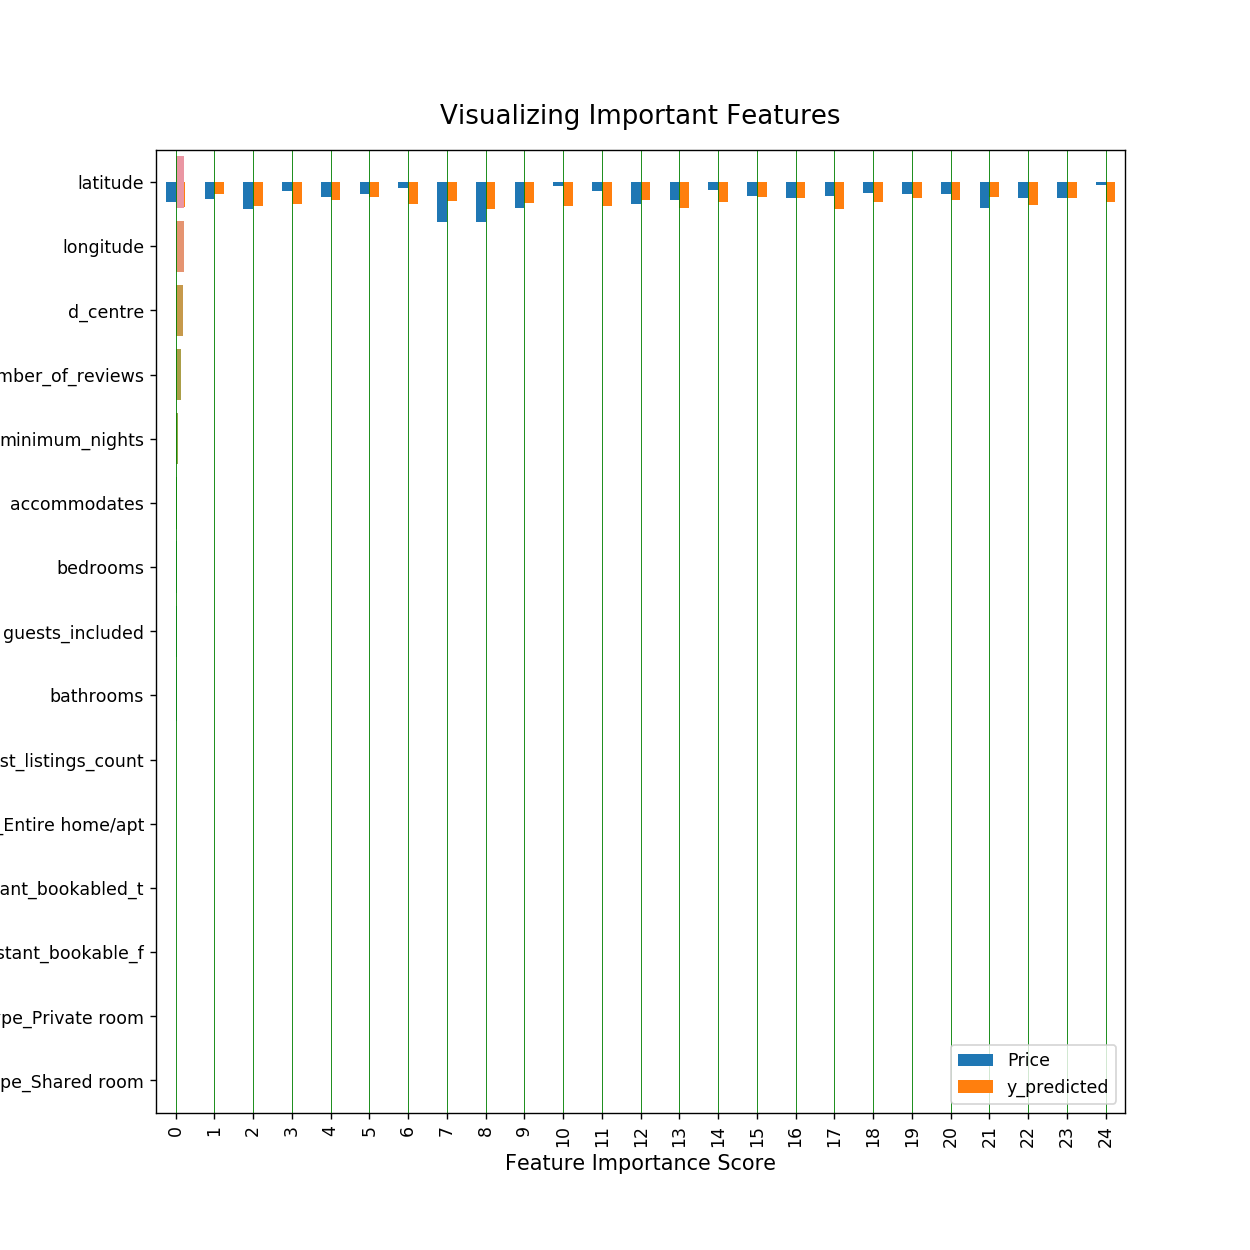

In [42]:
random_forest = RandomForestRegressor() 
random_forest.fit(X_train_scaled, y_train_scaled)
test_predicted = random_forest.predict(X_test_scaled) 
train_predicted = random_forest.predict(X_train_scaled) 
test_predicted=test_predicted.reshape(-1,1)
train_predicted=train_predicted.reshape(-1,1)

train_MSD = mean_squared_error(y_train_scaled, train_predicted)
train_R2 = r2_score(y_train_scaled, train_predicted)
test_MSD = mean_squared_error(y_test_scaled, test_predicted)
test_R2 = r2_score(y_test_scaled, test_predicted)

print("Error mitjà d'entrenament: ", train_MSD)
print("Error mitjà de test: ", test_MSD)
print("R2 d'entrenament: ", train_R2)
print("R2 de test: ", test_R2)

df = y_test_scaled.assign(y_predicted=test_predicted)
df = df.rename(columns={'160.0' : 'y_real'})

df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


In [56]:
#test=y_test.assign(Price=y_trai)
#nums=list(range(16))
columns=["accommodates", "bathrooms", "bedrooms", "host_listings_count", "guests_included", "host_listings_count", "latitude", "longitude", "minimum_nights", "number_of_reviews", "d_centre", "instant_bookable_f", "instant_bookabled_t", "room_type_Entire home/apt", "type_Private room", "type_Shared room"]

Veiem pels resultats de R2 i error que hi ha overfitting

<IPython.core.display.Javascript object>


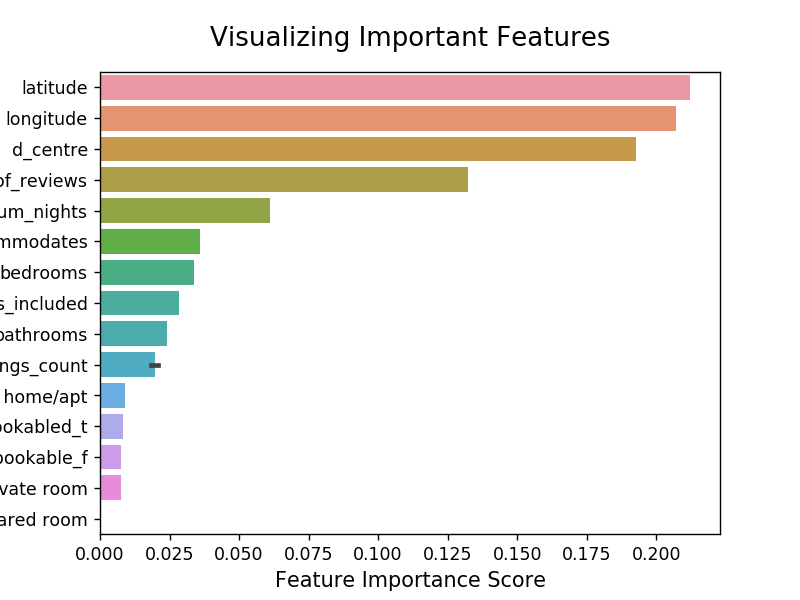

AxesSubplot(0.125,0.11;0.775x0.77)


In [59]:
feature_imp = pd.Series(random_forest.feature_importances_, 
                        index=columns).sort_values(ascending=False)
plt.figure()

print(sns.barplot(x=feature_imp, y=feature_imp.index))
plt.xlabel('Feature Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title("Visualizing Important Features", fontsize=15, pad=15)
plt.show()

In [74]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(random_forest, threshold=0.150)
X_train_important = selector.fit_transform(X_train_scaled, y_train_scaled)
X_test_important = selector.fit_transform(X_test_scaled, y_test_scaled)
X_train_important=DataFrame(X_train_important)
X_test_important=DataFrame(X_test_important)

C:\Users\cfrag\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)
C:\Users\cfrag\Anaconda3\lib\site-packages\sklearn\feature_selection\from_model.py:196: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


C:\Users\cfrag\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Error mitjà d'entrenament:  0.005076003041092028
Error mitjà de test:  0.03010177387362335
R2 d'entrenament:  0.7786707731736182
R2 de test:  -0.236935213748924


<IPython.core.display.Javascript object>


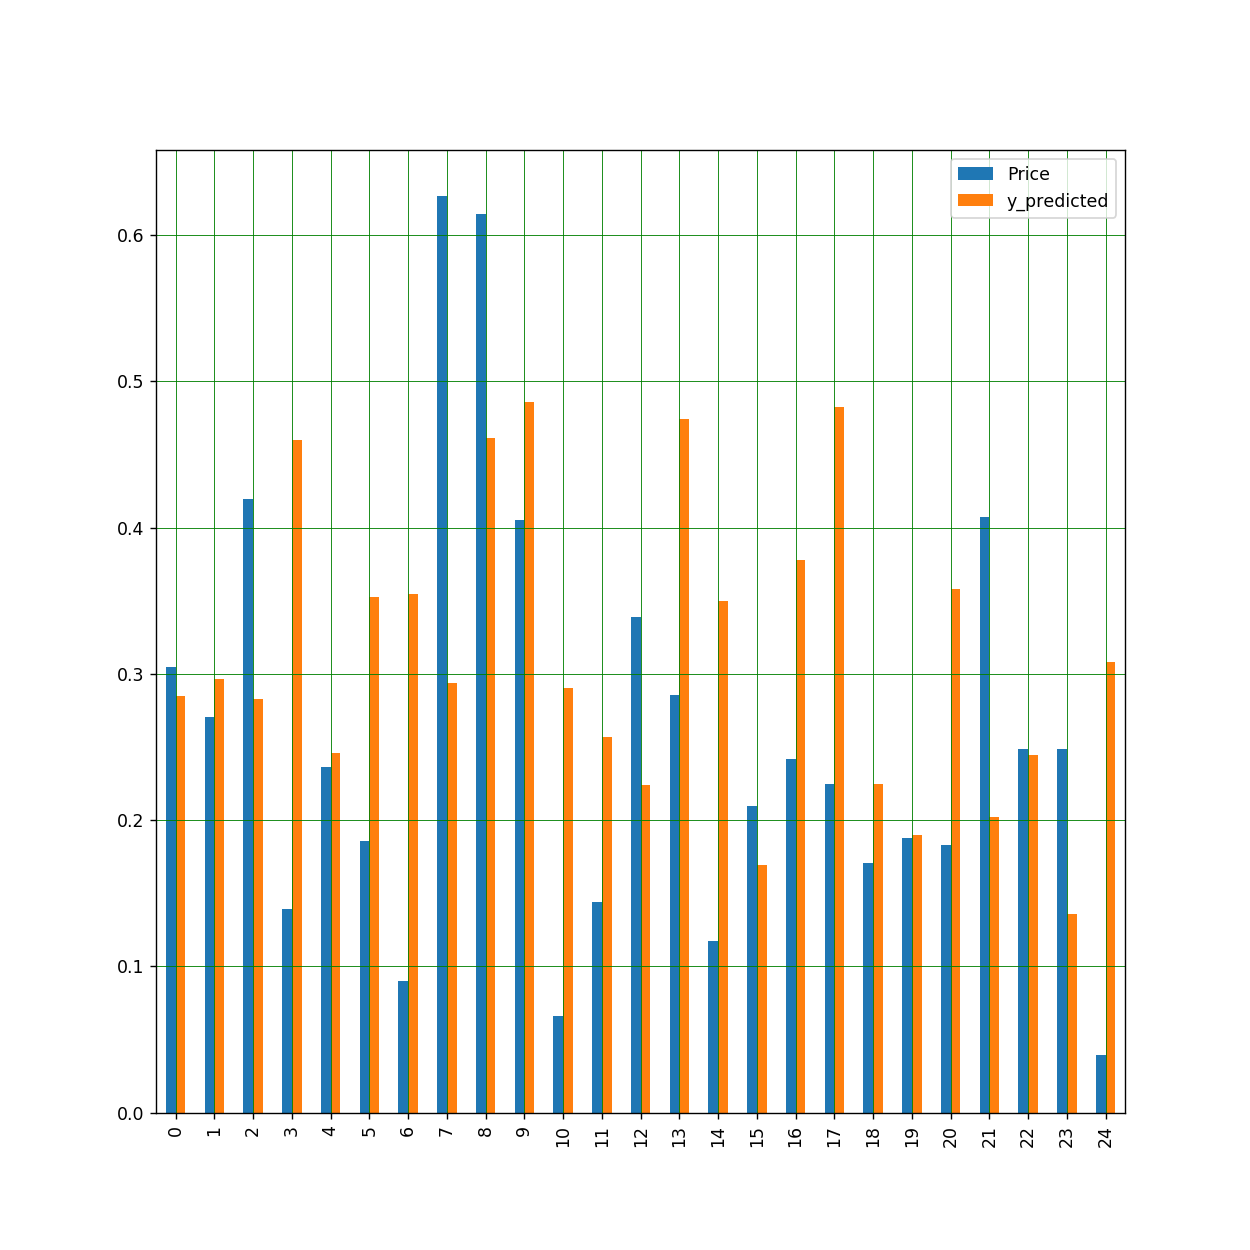

In [75]:
random_forest = RandomForestRegressor() 
random_forest.fit(X_train_important, y_train_scaled)
test_predicted = random_forest.predict(X_test_important) 
train_predicted = random_forest.predict(X_train_important) 
test_predicted=test_predicted.reshape(-1,1)
train_predicted=train_predicted.reshape(-1,1)

train_MSD = mean_squared_error(y_train_scaled, train_predicted)
train_R2 = r2_score(y_train_scaled, train_predicted)
test_MSD = mean_squared_error(y_test_scaled, test_predicted)
test_R2 = r2_score(y_test_scaled, test_predicted)

print("Error mitjà d'entrenament: ", train_MSD)
print("Error mitjà de test: ", test_MSD)
print("R2 d'entrenament: ", train_R2)
print("R2 de test: ", test_R2)

df = y_test_scaled.assign(y_predicted=test_predicted)
df = df.rename(columns={'160.0' : 'y_real'})

df1 = df.head(25)
df1.plot(kind='bar',figsize=(10,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Vriem la profunditat maxima del random forest

In [77]:
train_MSD=[]
train_R2=[]
test_MSD=[]
test_R2=[]
max_depths=list(range(1,10))
for max_depth in max_depths:    
    random_forest = RandomForestRegressor(max_depth=max_depth) 
    random_forest.fit(X_train_scaled, y_train_scaled)
    test_predicted = random_forest.predict(X_test_scaled) 
    train_predicted = random_forest.predict(X_train_scaled) 
    test_predicted=test_predicted.reshape(-1,1)
    train_predicted=train_predicted.reshape(-1,1)

    train_MSD.append(mean_squared_error(y_train_scaled, train_predicted))
    train_R2.append(r2_score(y_train_scaled, train_predicted))
    test_MSD.append(mean_squared_error(y_test_scaled, test_predicted))
    test_R2.append(r2_score(y_test_scaled, test_predicted))



C:\Users\cfrag\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\cfrag\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\cfrag\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarni

<IPython.core.display.Javascript object>


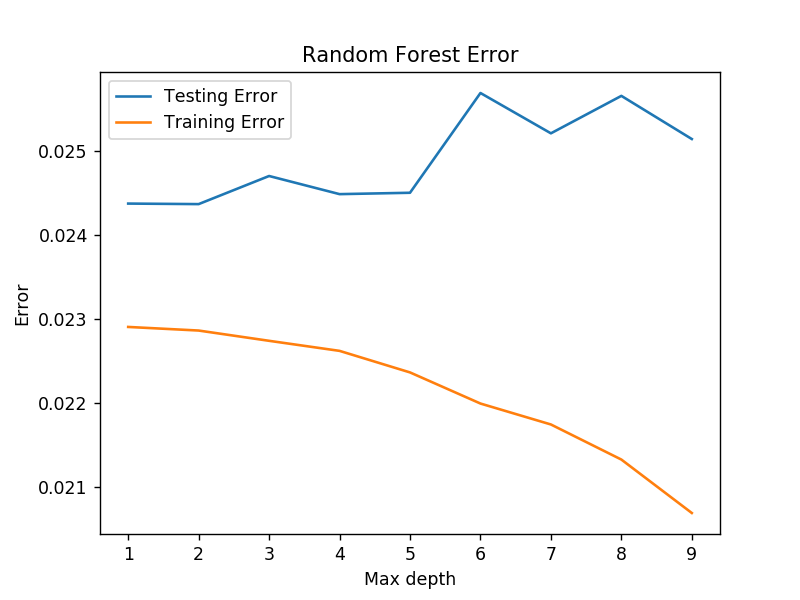

In [79]:
plt.figure()
plt.title('Random Forest Error')
plt.plot(max_depths, test_MSD, label = 'Testing Error')
plt.plot(max_depths, train_MSD, label = 'Training Error')
plt.legend()
plt.xlabel('Max depth')
plt.ylabel('Error')
plt.show()

<IPython.core.display.Javascript object>


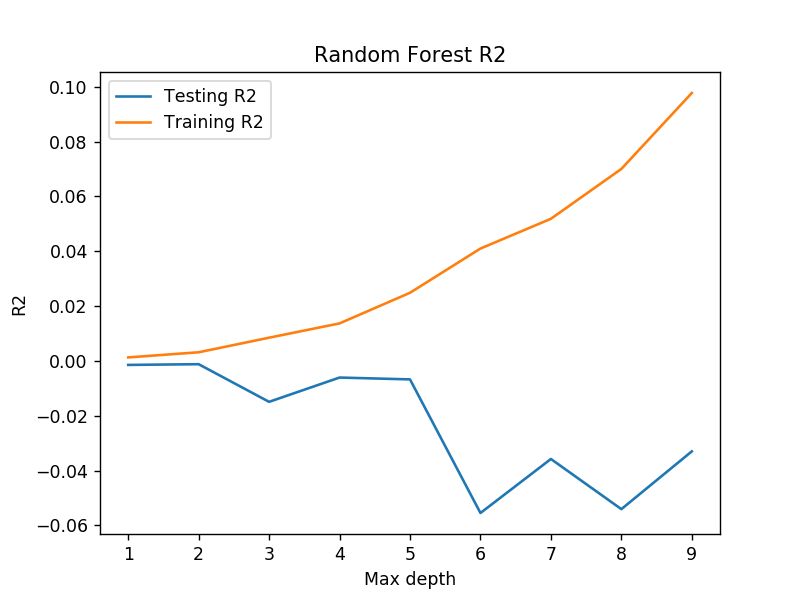

In [80]:
plt.figure()
plt.title('Random Forest R2')
plt.plot(max_depths, test_R2, label = 'Testing R2')
plt.plot(max_depths, train_R2, label = 'Training R2')
plt.legend()
plt.xlabel('Max depth')
plt.ylabel('R2')
plt.show()

Variem el nombre d'arbres del random forest

In [87]:
train_MSD=[]
train_R2=[]
test_MSD=[]
test_R2=[]
num_trees=list(range(3,60))
for trees in num_trees:    
    random_forest = RandomForestRegressor(n_estimators=trees) 
    random_forest.fit(X_train_scaled, y_train_scaled)
    test_predicted = random_forest.predict(X_test_scaled) 
    train_predicted = random_forest.predict(X_train_scaled) 
    test_predicted=test_predicted.reshape(-1,1)
    train_predicted=train_predicted.reshape(-1,1)

    train_MSD.append(mean_squared_error(y_train_scaled, train_predicted))
    train_R2.append(r2_score(y_train_scaled, train_predicted))
    test_MSD.append(mean_squared_error(y_test_scaled, test_predicted))
    test_R2.append(r2_score(y_test_scaled, test_predicted))



C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A col

C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\cfrag\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A col

<IPython.core.display.Javascript object>


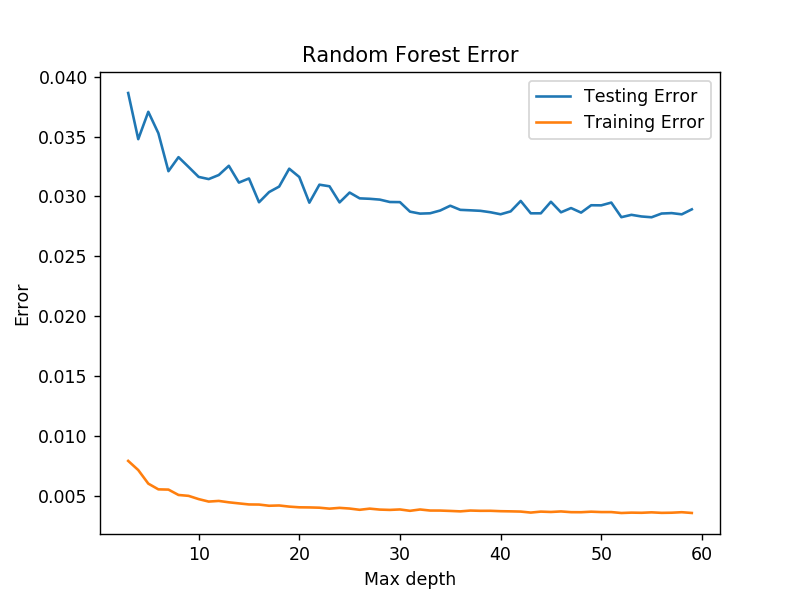

In [88]:
plt.figure()
plt.title('Random Forest Error')
plt.plot(num_trees, test_MSD, label = 'Testing Error')
plt.plot(num_trees, train_MSD, label = 'Training Error')
plt.legend()
plt.xlabel('Max depth')
plt.ylabel('Error')
plt.show()

<IPython.core.display.Javascript object>


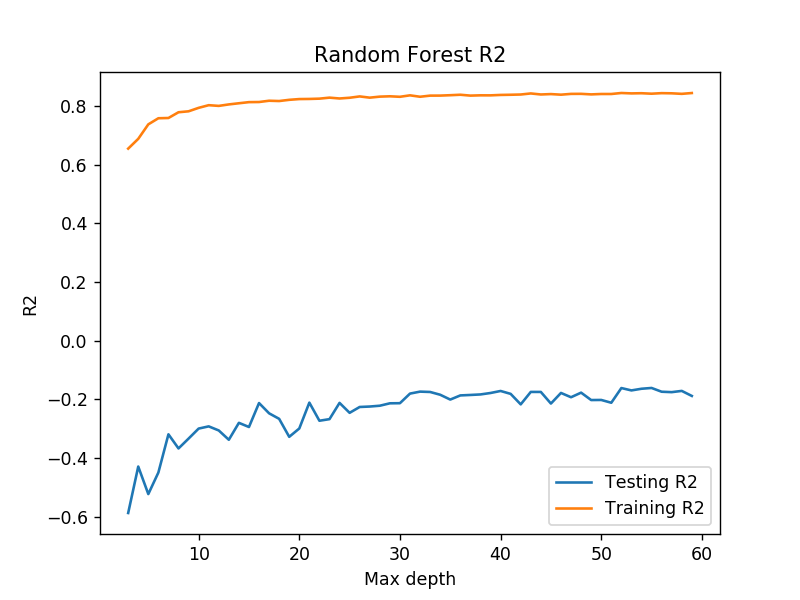

In [89]:
plt.figure()
plt.title('Random Forest R2')
plt.plot(num_trees, test_R2, label = 'Testing R2')
plt.plot(num_trees, train_R2, label = 'Training R2')
plt.legend()
plt.xlabel('Max depth')
plt.ylabel('R2')
plt.show()

Models de regressió:
- Regressió Lineal
- Regressió Multilineal
- Logistic regression
- Descens del gràdient

Ensemble learning
- Random  Forest
- Decision Tree


Mirar lo dels hyperparametres